# Encoding and Vectorizing Text  

In [1]:
#Upgrade dependencies
!pip install --upgrade pip
!pip install --upgrade boto3
!pip install --upgrade scikit-learn
!pip install --upgrade sagemaker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 98.1 MB/s eta 0:00:00
  Attempting uninstall: botocore
    Found existing installation: botocore 1.35.76
    Uninstalling botocore-1.35.76:
      Successfully uninstalled botocore-1.35.76
  Attempting uninstall: boto3
    Found existing installation: boto3 1.35.76
    Uninstalling boto3-1.35.76:
      Successfully uninstalled boto3-1.35.76
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.36.17 requires botocore==1.35.76, but you have botocore 1.35.83 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 37.3 MB/s eta 0:00:00:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.4 MB/s eta 

## 1. Working with binary

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = ["This document is the first document",
             "This document is the second document",
             "and this is the third one"]

# Initialize the count vectorizer with the parameter: binary=True
binary_vectorizer = CountVectorizer(binary=True)

# fit_transform() function fits the text data and gets the binary BoW vectors
x = binary_vectorizer.fit_transform(sentences)

In [3]:
x.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1]])

In [4]:
binary_vectorizer.vocabulary_

{'this': 8,
 'document': 1,
 'is': 3,
 'the': 6,
 'first': 2,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

In [5]:
print(binary_vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [6]:
new_sentence = ["This is the new sentence"]

new_vectors = binary_vectorizer.transform(new_sentence)

In [7]:
new_vectors.toarray()

array([[0, 0, 0, 1, 0, 0, 1, 0, 1]])

## 2. Working with word counts

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = ["This document is the first document", "This document is the second document", "and this is the third one"]

# Initialize the count vectorizer
count_vectorizer = CountVectorizer()

xc = count_vectorizer.fit_transform(sentences)

xc.toarray()

array([[0, 2, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1]])

In [9]:
new_sentence = ["This is the new sentence"]
new_vectors = count_vectorizer.transform(new_sentence)
new_vectors.toarray()

array([[0, 0, 0, 1, 0, 0, 1, 0, 1]])

## 3. Working with term frequency (TF)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer(use_idf=False)

x = tf_vectorizer.fit_transform(sentences)

x.toarray()

array([[0.        , 0.70710678, 0.35355339, 0.35355339, 0.        ,
        0.        , 0.35355339, 0.        , 0.35355339],
       [0.        , 0.70710678, 0.        , 0.35355339, 0.        ,
        0.35355339, 0.35355339, 0.        , 0.35355339],
       [0.40824829, 0.        , 0.        , 0.40824829, 0.40824829,
        0.        , 0.40824829, 0.40824829, 0.40824829]])

In [11]:
new_sentence = ["This is the new sentence"]
new_vectors = tf_vectorizer.transform(new_sentence)
new_vectors.toarray()

array([[0.        , 0.        , 0.        , 0.57735027, 0.        ,
        0.        , 0.57735027, 0.        , 0.57735027]])

## 4. Working with term frequency inverse document frequency (TF-IDF)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=True)

sentences = ["This document is the first document",
             "This document is the second document",
             "and this is the third one"]

xf = tfidf_vectorizer.fit_transform(sentences)

xf.toarray()

array([[0.        , 0.7284449 , 0.47890875, 0.28285122, 0.        ,
        0.        , 0.28285122, 0.        , 0.28285122],
       [0.        , 0.7284449 , 0.        , 0.28285122, 0.        ,
        0.47890875, 0.28285122, 0.        , 0.28285122],
       [0.49711994, 0.        , 0.        , 0.29360705, 0.49711994,
        0.        , 0.29360705, 0.49711994, 0.29360705]])

In [13]:
new_sentence = ["This is the new sentence"]
new_vectors = tfidf_vectorizer.transform(new_sentence)
new_vectors.toarray()

array([[0.        , 0.        , 0.        , 0.57735027, 0.        ,
        0.        , 0.57735027, 0.        , 0.57735027]])

In [14]:
tfidf_vectorizer.idf_

array([1.69314718, 1.28768207, 1.69314718, 1.        , 1.69314718,
       1.69314718, 1.        , 1.69314718, 1.        ])

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentences = ["This document is the first document",
             "This document is the second document",
             "and this is the third one"]

tfidf_vectorizer = TfidfVectorizer()
xf = tfidf_vectorizer.fit_transform(sentences)
xf.toarray()

array([[0.        , 0.7284449 , 0.47890875, 0.28285122, 0.        ,
        0.        , 0.28285122, 0.        , 0.28285122],
       [0.        , 0.7284449 , 0.        , 0.28285122, 0.        ,
        0.47890875, 0.28285122, 0.        , 0.28285122],
       [0.49711994, 0.        , 0.        , 0.29360705, 0.49711994,
        0.        , 0.29360705, 0.49711994, 0.29360705]])

## 5. Using Word2vec with BlazingText

### Performing setup


In [16]:
output_bucket = 'c144486a3735937l8791488t1w312546692831-labbucket-z9ta1e0ich4o'

In [17]:
import sagemaker
from sagemaker import get_execution_role
import boto3
import json

sess = sagemaker.Session()

role = get_execution_role()
print(role)  # SageMaker uses this role to use AWS resources (Amazon S3, Amazon CloudWatch) on your behalf

region = boto3.Session().region_name

print(output_bucket)
output_prefix = "sagemaker/blazingtext-text8"  # Replace with the prefix under which you want to store the data, if needed

data_bucket = output_bucket
data_prefix = "blazingtext"

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[12/18/24 15:32:24] INFO     Found credentials from IAM Role:                                   ]8;id=907692;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=878662;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


[12/18/24 15:32:27] INFO     Found credentials from IAM Role:                                   ]8;id=688874;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=915911;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

                    INFO     Found credentials from IAM Role:                                   ]8;id=933668;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=394188;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

arn:aws:iam::312546692831:role/service-role/c144486a3735937l8791488t1w31-SageMakerExecutionRole-YCWfrFzBlW8e
c144486a3735937l8791488t1w312546692831-labbucket-z9ta1e0ich4o


### Performing data ingestion

In [18]:
train_channel = f"{data_prefix}"

s3_train_data = f"s3://{data_bucket}/{train_channel}"

In [19]:
s3_output_location = f"s3://{output_bucket}/{output_prefix}/output"

### Setting up training

In [20]:
region_name = boto3.Session().region_name

In [21]:
from sagemaker.image_uris import retrieve
container = retrieve('blazingtext',boto3.Session().region_name,"latest")
print(f"Using SageMaker BlazingText container: {container} ({region_name})")

                    INFO     Same images used for training and inference. Defaulting to image     ]8;id=880399;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=43250;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#391\391]8;;\
                             scope: inference.                                                                     

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=44465;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=708552;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#528\528]8;;\

Using SageMaker BlazingText container: 811284229777.dkr.ecr.us-east-1.amazonaws.com/blazingtext:1 (us-east-1)


### Training the BlazingText model for generating word vectors

In [22]:
bt_model = sagemaker.estimator.Estimator(
    container,
    role,
    instance_count=2,
    instance_type="ml.c4.2xlarge",
    volume_size=5,
    max_run=360000,
    input_mode="File",
    output_path=s3_output_location,
    sagemaker_session=sess,
)

                    INFO     Found credentials from IAM Role:                                   ]8;id=536836;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=420642;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

See the [algorithm documentation](https://docs.aws.amazon.com/sagemaker/latest/dg/blazingtext_hyperparameters.html) for the complete list of hyperparameters.

In [23]:
bt_model.set_hyperparameters(
    mode="batch_skipgram",
    epochs=5,
    min_count=5,
    sampling_threshold=0.0001,
    learning_rate=0.05,
    window_size=5,
    vector_dim=100,
    negative_samples=5,
    batch_size=11,  #  = (2*window_size + 1) (Preferred. Used only if mode is batch_skipgram)
    evaluation=True,  # Perform similarity evaluation on WS-353 dataset at the end of training
    subwords=False,
)  # Subword embedding learning is not supported by batch_skipgram

In [24]:
train_data = sagemaker.inputs.TrainingInput(
    s3_train_data, distribution="FullyReplicated", content_type="text/plain", s3_data_type="S3Prefix"
)
data_channels = {"train": train_data}

In [25]:
bt_model.fit(inputs=data_channels, logs=True)

                    INFO     SageMaker Python SDK will collect telemetry to help us better  ]8;id=229009;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py\telemetry_logging.py]8;;\:]8;id=956360;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py#90\90]8;;\
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

                    INFO     Creating training-job with name: blazingtext-2024-12-18-15-32-27-932   ]8;id=985094;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=241951;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#1042\1042]8;;\

2024-12-18 15:32:29 Starting - Starting the training job...
2024-12-18 15:32:44 Starting - Preparing the instances for training...
2024-12-18 15:33:12 Downloading - Downloading input data...
2024-12-18 15:33:43 Training - Training image download completed. Training in progress.Arguments: train
Found 10.2.137.63 for host algo-1
Found 10.2.169.23 for host algo-2
Arguments: train
Found 10.2.137.63 for host algo-1
Found 10.2.169.23 for host algo-2
[12/18/2024 15:34:03 WARNING 139728900048704] Loggers have already been setup.
[12/18/2024 15:34:03 WARNING 139728900048704] Loggers have already been setup.
/opt/amazon/python3.8/lib/python3.8/subprocess.py:848: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
[12/18/2024 15:34:03 INFO 139728900048704] nvidia-smi took: 0.025156497955322266 secs to identify 0 gpus
[12/18/2024 15:34:03 INFO 139728900048704] Running distributed CPU Blazi

### Deploying the trained model: Hosting and inference

In [26]:
bt_endpoint = bt_model.deploy(initial_instance_count=1, instance_type="ml.m4.xlarge")

[12/18/24 15:35:15] INFO     Creating model with name: blazingtext-2024-12-18-15-35-15-516          ]8;id=116594;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=958855;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

[12/18/24 15:35:16] INFO     Creating endpoint-config with name blazingtext-2024-12-18-15-35-15-516 ]8;id=625080;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=385590;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5889\5889]8;;\

                    INFO     Creating endpoint with name blazingtext-2024-12-18-15-35-15-516        ]8;id=843117;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=955567;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4711\4711]8;;\

-----!

### Getting vector representations for words

#### Using the JSON format for inference

In [27]:
words = ["awesome", "blazing"]

payload = {"instances": words}

response = bt_endpoint.predict(
    json.dumps(payload), initial_args={"ContentType": "application/json", "Accept": "application/json"}
)

vecs = json.loads(response)
print(vecs)

[{'vector': [0.06275077909231186, 0.0678844004869461, -0.04395692050457001, 0.04483771324157715, -0.020095277577638626, 0.12691554427146912, -0.04786915332078934, 0.17165285348892212, -0.12786884605884552, 0.09860336780548096, -0.1711016148328781, -0.09829689562320709, 0.11804190278053284, -0.10143328458070755, 0.1097782552242279, 0.09361250698566437, -0.2506447434425354, 0.06787365674972534, 0.037442099303007126, -0.09158031642436981, -0.09384049475193024, -0.09212561696767807, -0.030566208064556122, -0.06509441137313843, -0.1447034627199173, 0.03633635491132736, 0.2977484464645386, 0.06078188121318817, 0.0493328720331192, 0.06323074549436569, 0.032950229942798615, 0.15371260046958923, 0.07068183273077011, 0.092002734541893, -0.2511785328388214, -0.0006169863045215607, 0.05944422259926796, -0.11078037321567535, -0.1138879805803299, 0.14315994083881378, 0.10138358920812607, 0.0939125120639801, -0.07020850479602814, 0.08028684556484222, 0.21965348720550537, -0.08540962636470795, 0.16936

As expected, you get an _n_-dimensional vector for each word (where _n_ is _vector_dim_, as specified in the hyperparameters). If the word isn't in the training dataset, the model will return a vector of zeros.

### Evaluating the model

In [28]:
s3 = boto3.resource("s3")

key = bt_model.model_data[bt_model.model_data.find("/", 5) + 1 :]
s3.Bucket(output_bucket).download_file(key, "model.tar.gz")

In [29]:
!tar -xvzf model.tar.gz

tar: Ignoring unknown extended header keyword `LIBARCHIVE.creationtime'
eval.json
tar: Ignoring unknown extended header keyword `LIBARCHIVE.creationtime'
vectors.txt
tar: Ignoring unknown extended header keyword `LIBARCHIVE.creationtime'
vectors.bin


In [30]:
!cat eval.json

{
    "EN-WS-353-ALL.txt": {
        "not_found": 2,
        "spearmans_rho": 0.7036167719177046,
        "total_pairs": 353
    },
    "EN-WS-353-REL.txt": {
        "not_found": 1,
        "spearmans_rho": 0.6688350707330899,
        "total_pairs": 252
    },
    "EN-WS-353-SIM.txt": {
        "not_found": 1,
        "spearmans_rho": 0.7397611407695287,
        "total_pairs": 203
    },
    "mean_rho": 0.704070994473441
}

In [31]:
import numpy as np
from sklearn.preprocessing import normalize

# Read the 400 most-frequent word vectors. The vectors in the file are in descending order of frequency.
num_points = 400

first_line = True
index_to_word = []
with open("vectors.txt", "r") as f:
    for line_num, line in enumerate(f):
        if first_line:
            dim = int(line.strip().split()[1])
            word_vecs = np.zeros((num_points, dim), dtype=float)
            first_line = False
            continue
        line = line.strip()
        word = line.split()[0]
        vec = word_vecs[line_num - 1]
        for index, vec_val in enumerate(line.split()[1:]):
            vec[index] = float(vec_val)
        index_to_word.append(word)
        if line_num >= num_points:
            break
word_vecs = normalize(word_vecs, copy=False, return_norm=False)

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=40, n_components=2, init="pca", n_iter=10000)
two_d_embeddings = tsne.fit_transform(word_vecs[:num_points])
labels = index_to_word[:num_points]

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[12/18/24 15:38:34] WARNING  Matplotlib is building the font cache; this may take a moment.    ]8;id=78305;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=969594;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/font_manager.py#1040\1040]8;;\

[12/18/24 15:38:35] INFO     generated new fontManager                                         ]8;id=159413;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=75421;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/font_manager.py#1584\1584]8;;\

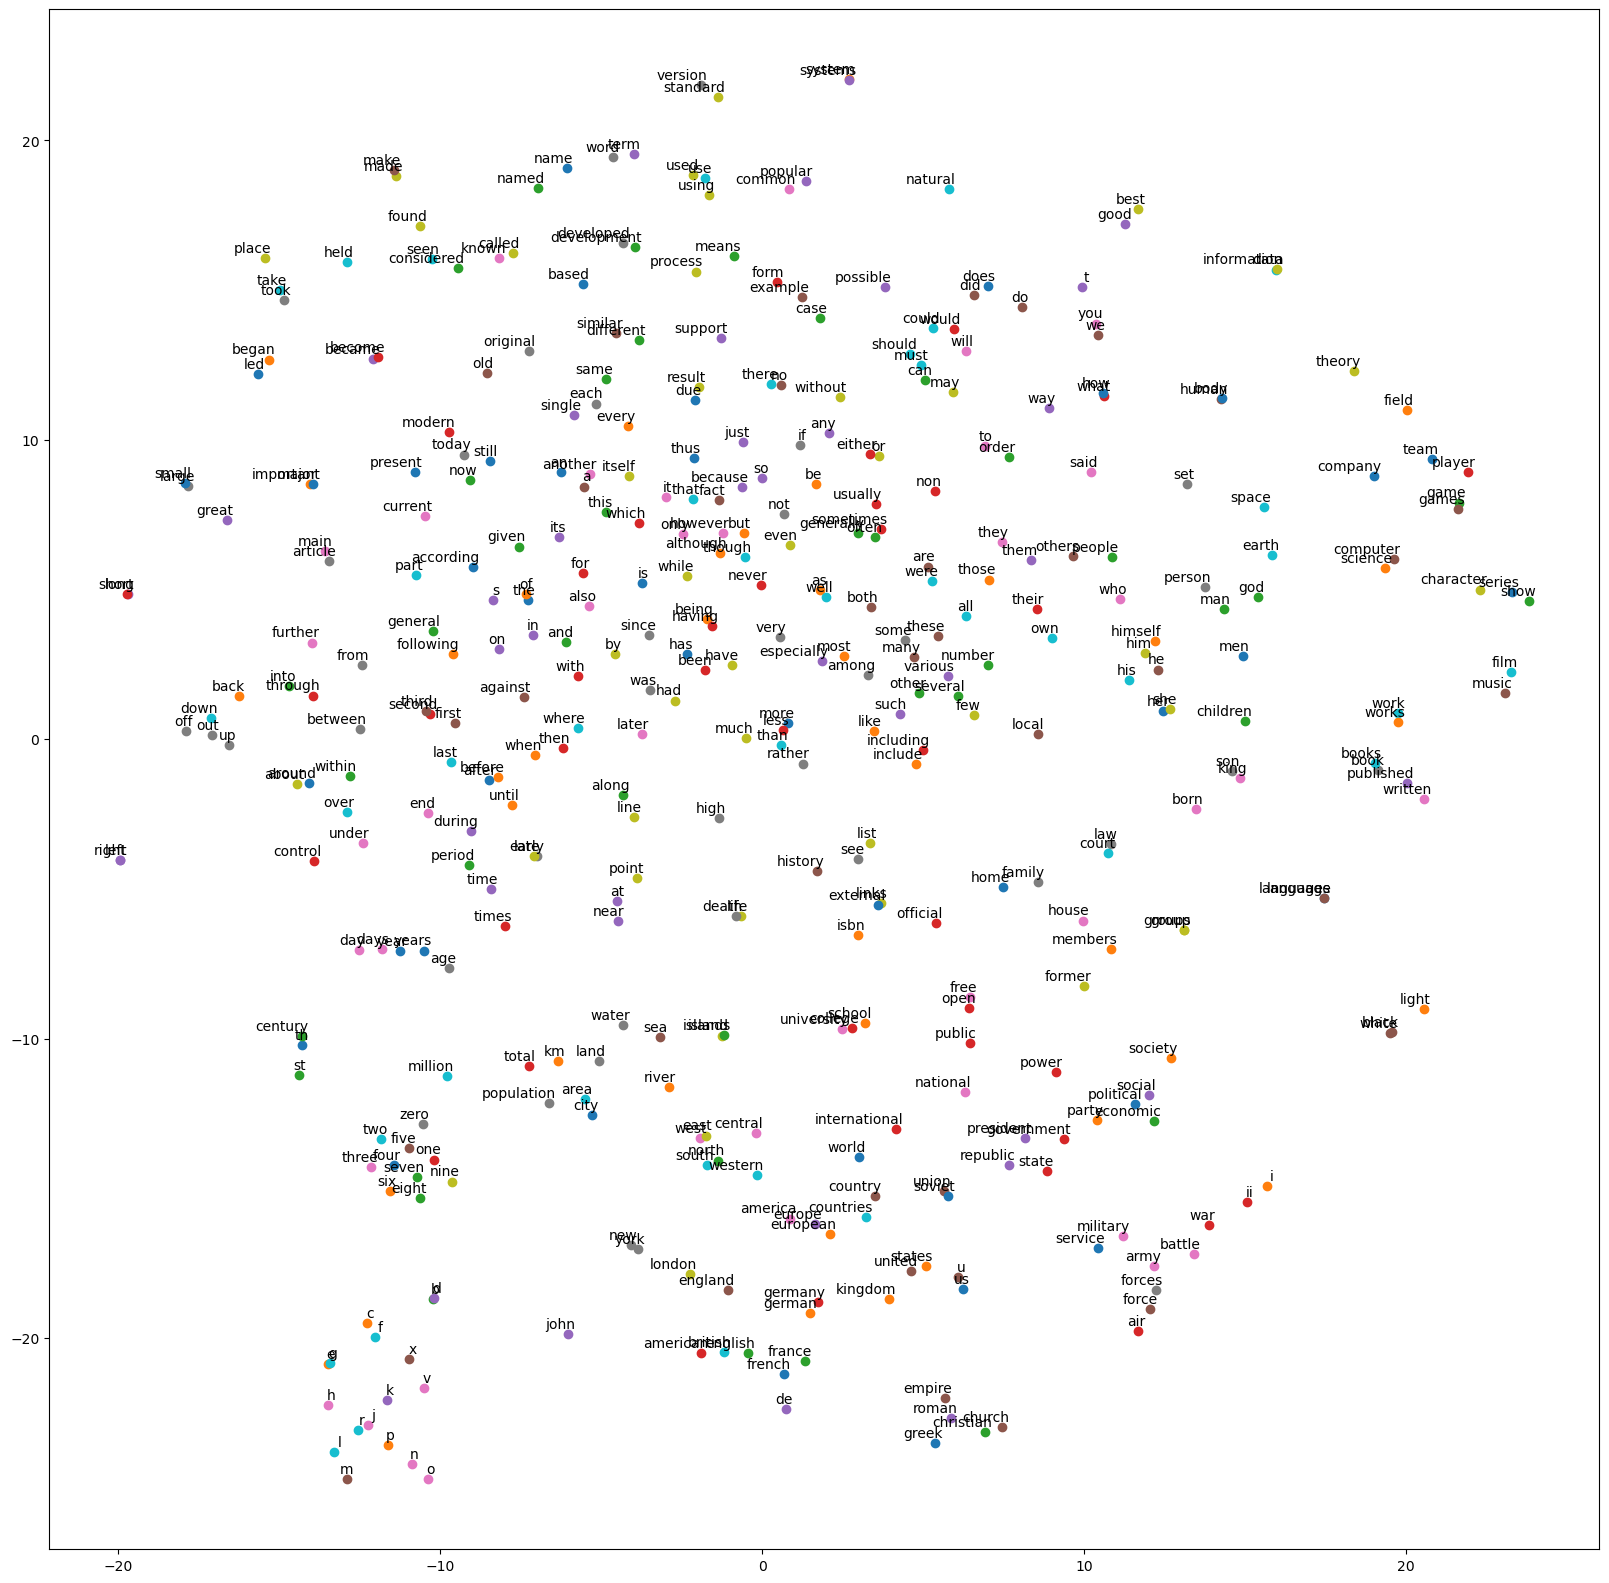

In [33]:
from matplotlib import pylab
%matplotlib inline

def plot(embeddings, labels):
    pylab.figure(figsize=(20, 20))
    for i, label in enumerate(labels):
        x, y = embeddings[i, :]
        pylab.scatter(x, y)
        pylab.annotate(
            label, xy=(x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom"
        )
    pylab.show()


plot(two_d_embeddings, labels)

### Stopping and closing the endpoint (*Optional*)

In [34]:
bt_endpoint.delete_endpoint()

[12/18/24 15:38:41] INFO     Deleting endpoint configuration with name:                             ]8;id=707903;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=123957;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4865\4865]8;;\
                             blazingtext-2024-12-18-15-35-15-516                                                   

                    INFO     Deleting endpoint with name: blazingtext-2024-12-18-15-35-15-516       ]8;id=557477;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=456894;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4855\4855]8;;\